<a href="https://colab.research.google.com/github/Chirag11Arora27/All_In_One/blob/main/Aadhaar_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
print(df.columns)
print(monthly.head())

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_enrolments', 'ADI'],
      dtype='object')
      date  total_enrolments  month_no
0  2025-03             16582         0
1  2025-04            257438         1
2  2025-05            183616         2
3  2025-06            215734         3
4  2025-07            616868         4


In [102]:
from sklearn.linear_model import LinearRegression

X = monthly[['month_no']]
y = monthly['total_enrolments']

model = LinearRegression()
model.fit(X, y)

future_pred = model.predict([[monthly['month_no'].max() + 1]])
future_pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1271030.55555556])

In [103]:
df['ADI'] = (df['age_0_5'] + df['age_5_17']) / df['age_18_greater']

In [104]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df['total_enrolments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

X = df[['age_0_5','age_5_17','age_18_greater']]
y = df['total_enrolments']

model = LinearRegression()
model.fit(X, y)

coefficients = pd.Series(model.coef_, index=X.columns)
coefficients

,0
age_0_5,1.0
age_5_17,1.0
age_18_greater,1.0


In [105]:
df['total_enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
df[df['total_enrolment'] > df['total_enrolment'].quantile(0.99)].head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments,ADI,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,1.945946,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,1.205128,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,9.250000,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,6.066667,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,1.428571,51


In [106]:
age_state = df.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()
age_state.head()

,age_0_5,age_5_17,age_18_greater
state,,,
100000,0,1,217
Andaman & Nicobar Islands,109,5,0
Andaman and Nicobar Islands,370,27,0
Andhra Pradesh,112440,13746,1495
Arunachal Pradesh,1957,2236,151


In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


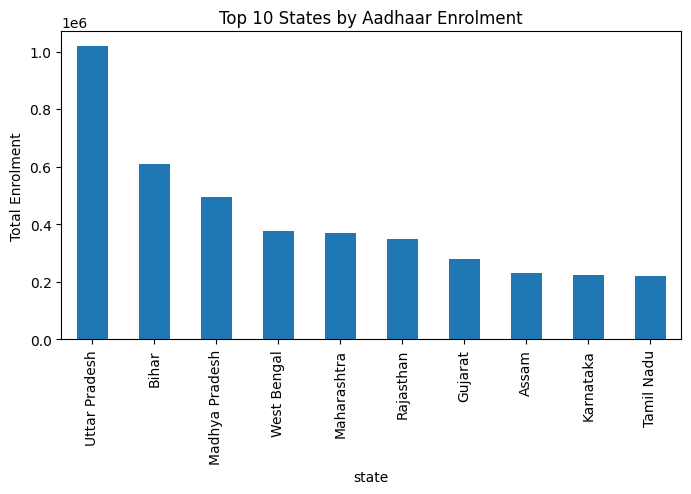

In [108]:
state_enrol.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 States by Aadhaar Enrolment")
plt.ylabel("Total Enrolment")
plt.show()

In [109]:
state_enrol = df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False)

state_enrol.head(10)

,total_enrolment
state,
Uttar Pradesh,1018629
Bihar,609585
Madhya Pradesh,493970
West Bengal,375297
Maharashtra,369139
Rajasthan,348458
Gujarat,280549
Assam,230197
Karnataka,223235


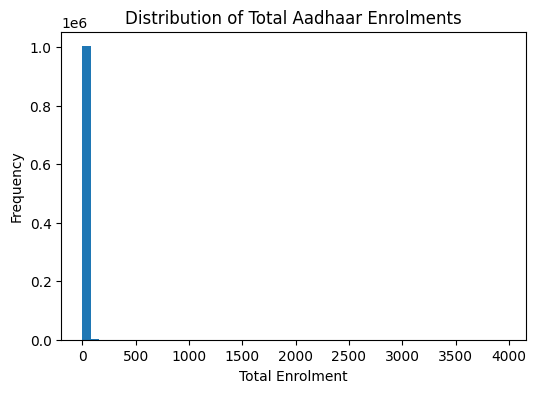

In [110]:
plt.figure(figsize=(6,4))
plt.hist(df['total_enrolment'], bins=50)
plt.title("Distribution of Total Aadhaar Enrolments")
plt.xlabel("Total Enrolment")
plt.ylabel("Frequency")
plt.show()

In [111]:
df['total_enrolment'].describe()

,total_enrolment
count,1.006029e+06
mean,5.403127e+00
std,3.158275e+01
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,5.000000e+00
max,3.965000e+03


In [112]:
df['total_enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments,ADI,total_enrolment
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,1.945946,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,1.205128,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,9.250000,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,6.066667,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,1.428571,51


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              1006029 non-null  datetime64[ns]
 1   state             1006029 non-null  object        
 2   district          1006029 non-null  object        
 3   pincode           1006029 non-null  int64         
 4   age_0_5           1006029 non-null  int64         
 5   age_5_17          1006029 non-null  int64         
 6   age_18_greater    1006029 non-null  int64         
 7   total_enrolments  1006029 non-null  int64         
 8   ADI               1006029 non-null  float64       
 9   total_enrolment   1006029 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 76.8+ MB


In [114]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_enrolments', 'ADI', 'total_enrolment'],
      dtype='object')

In [115]:
df = pd.read_csv('adhaar_enrollment.csv')
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [116]:
df.shape

(1006029, 7)

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('adhaar_enrollment.csv')
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
